In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [3]:
calibrator = Calibrator('calibration.pkl',redo=True)
calibrator.create_all_teams()
calibrator.process_data()
teams=calibrator.teams
calibrator.get_current_results('BPL').tail(10)

Force recalibrate
calibration.pkl  exists.


,Date,League,HomeTeam,AwayTeam,FTHG,FTAG,xg1,xg2,nsxg1,nsxg2
17119,2019-01-01,BPL,Everton,Leicester City,0,1,1.03,0.58,1.74,0.59
17150,2019-01-01,BPL,Arsenal,Fulham,4,1,4.46,1.51,3.01,0.73
17157,2019-01-01,BPL,Cardiff City,Tottenham Hotspur,0,3,0.90,1.57,0.83,0.74
17163,2019-01-02,BPL,AFC Bournemouth,Watford,3,3,3.24,0.95,2.15,1.50
17164,2019-01-02,BPL,Chelsea,Southampton,0,0,0.99,0.19,1.58,0.45
17165,2019-01-02,BPL,Huddersfield Town,Burnley,1,2,0.81,2.88,0.84,1.27
17166,2019-01-02,BPL,Wolverhampton,Crystal Palace,0,2,0.83,2.00,0.55,0.69
17167,2019-01-02,BPL,West Ham United,Brighton and Hove Albion,2,2,0.90,0.84,1.36,0.83
17168,2019-01-02,BPL,Newcastle,Manchester United,0,2,0.64,2.34,0.95,1.46
17173,2019-01-03,BPL,Manchester City,Liverpool,2,1,1.01,1.52,1.11,1.62


In [3]:
np.unique(calibrator.raw_data['League'])

array(['AA', 'APD', 'ATB', 'BJL', 'BPL', 'BSA', 'CSL', 'DE', 'DS', 'ELC',
       'ELO', 'ELT', 'FL1', 'FL2', 'G2B', 'GB', 'GSL', 'ISA', 'ISB',
       'JJL', 'MLS', 'MPDTA', 'NT', 'NWSL', 'PL', 'RPL', 'SA', 'SAAPL',
       'SP', 'SPD', 'SRSL', 'SSD', 'TTSL', 'UCL', 'UEL', 'USL'],
      dtype=object)

In [4]:
Teams=dict()
League=dict()

In [8]:
country='UEFA'
home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=2,nr_degr=4)

#League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
df=League[country].season_report()
df['Rating']=df['Off']*(1-df['Deff'])
df

[0, 1]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr,Rating
GB,0,25.6,18,33,5,1,40.80,67.01,4.20,0.39,9.75,2.5620
SPD,0,25.0,17,33,5,1,34.81,61.84,3.54,0.33,11.15,2.3718
BPL,0,20.5,13,28,7,1,9.29,24.75,3.11,0.40,38.60,1.8660
ISA,0,19.7,12,28,8,1,7.50,20.41,3.13,0.43,44.98,1.7841
PL,0,17.9,10,26,8,2,3.53,11.36,2.52,0.39,61.10,1.5372
FL1,0,16.0,9,24,8,2,1.75,5.73,3.16,0.56,74.72,1.3904
DE,0,15.8,8,24,8,2,1.64,5.72,3.31,0.59,76.00,1.3571
RPL,0,14.5,7,22,8,3,0.68,3.18,2.79,0.55,83.70,1.2555


In [10]:
country='ISA'
lH,pH=calibrator.teams[country+'Home'].means()
lA,pA=calibrator.teams[country+'Away'].means()
home_advantage=np.array([lH-lA,pH/pA])
#home_advantage=[0,1]
print(home_advantage)
Teams[country]= calibrator.get_teams_for_league(country)
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=4)
League[country].process_current_results(calibrator.get_current_results(country))
League[country].simulate_season(n_scenarios=100000)
League[country].season_report()

[0.52710597 0.93644067]
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Juventus,53,93.7,85,102,1,1,96.46,100.00,4.64,0.20,0.00
Napoli,44,78.7,70,87,4,2,2.35,97.72,4.36,0.31,0.00
Internazionale,39,77.1,68,85,4,2,1.19,96.59,4.20,0.23,0.00
AS Roma,30,65.0,56,74,9,3,0.00,34.60,4.52,0.32,0.00
Lazio,32,64.7,56,73,9,3,0.00,30.37,4.46,0.36,0.00
AC Milan,31,62.3,53,71,10,4,0.00,16.09,3.76,0.32,0.00
Atalanta,28,61.9,53,71,10,4,0.00,16.73,4.69,0.37,0.00
Torino,27,57.9,49,67,11,5,0.00,4.31,3.50,0.31,0.00
Fiorentina,26,56.1,47,65,12,5,0.00,2.33,3.45,0.33,0.00
Sampdoria,29,54.1,45,63,12,6,0.00,1.10,3.53,0.46,0.00


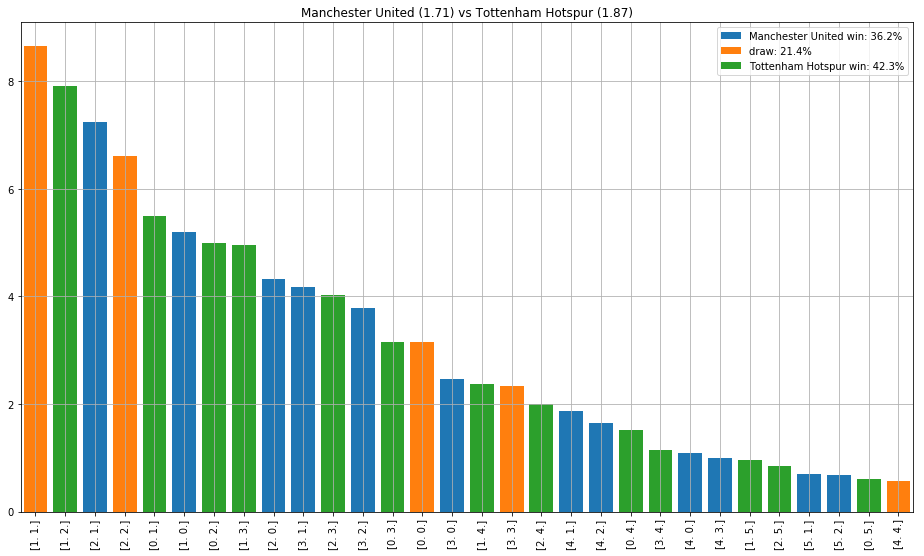

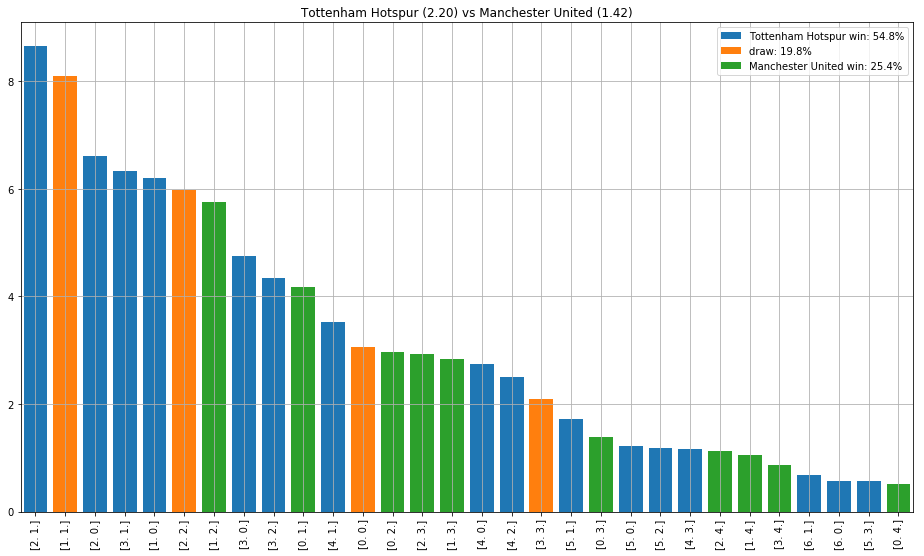

In [13]:
team1=teams['Manchester United']
team2=teams['Tottenham Hotspur']
fig=plt.figure(1)
team1.outcomes_vs(team2,home_advantage=np.array([lH-lA,pH/pA]))
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=np.array([lH-lA,pH/pA]))
fig = plt.gcf()
fig.set_size_inches(16,9)

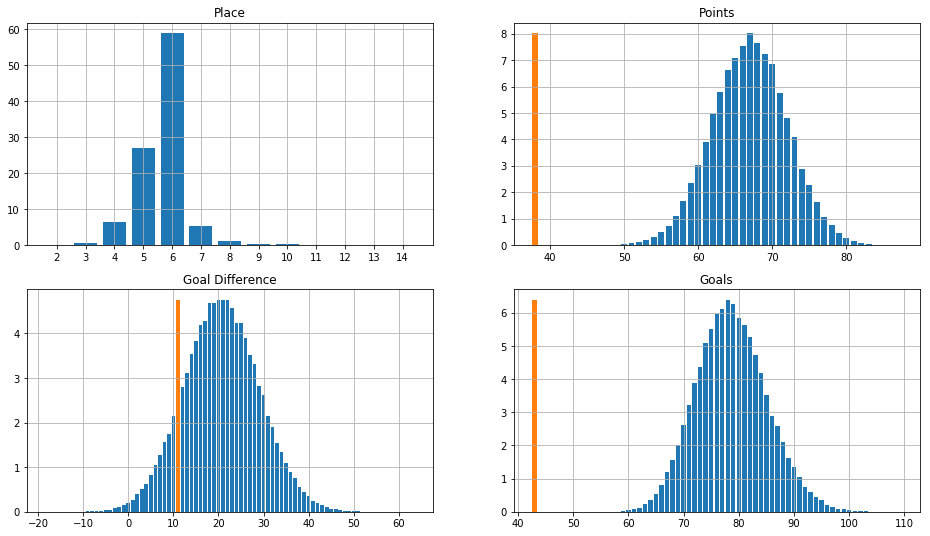

In [8]:
PremierLeague=League['BPL']
PremierLeague.team_report('Manchester United')

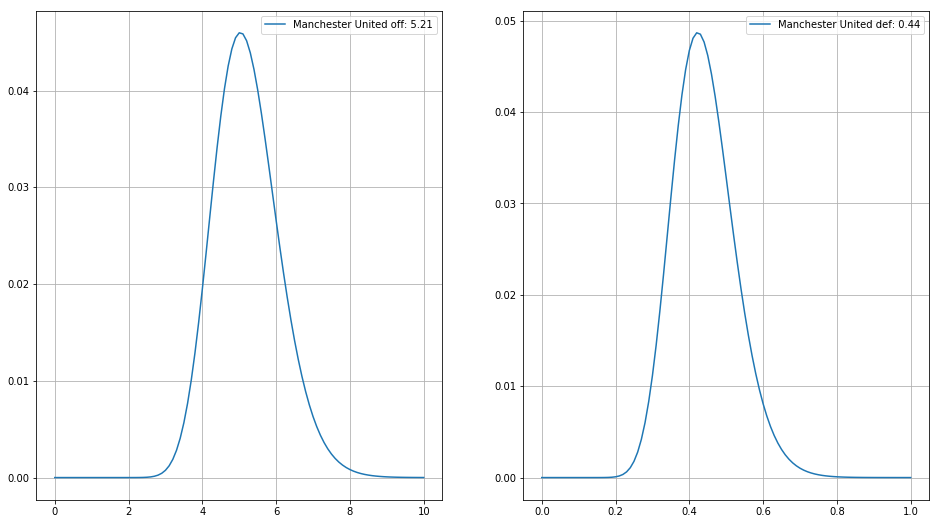

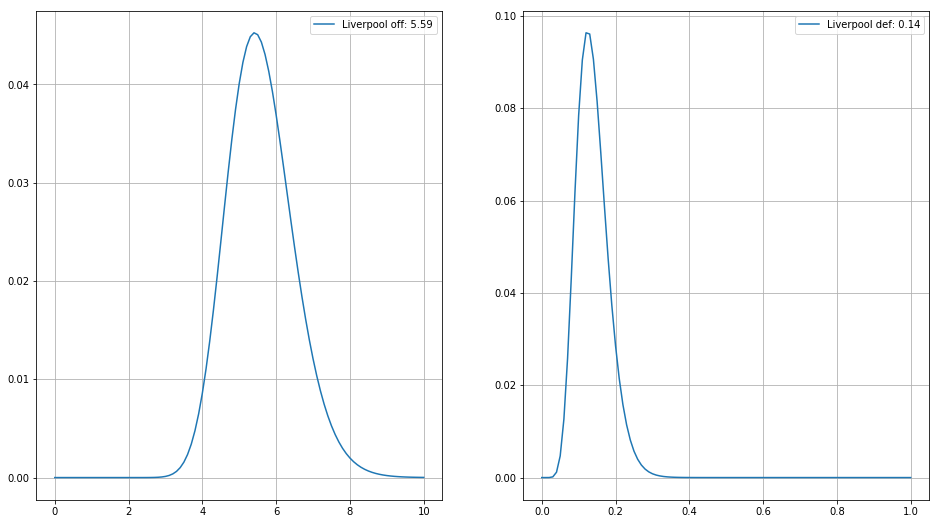

In [9]:
teams['Manchester United'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)
teams['Liverpool'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)

# Most important matches

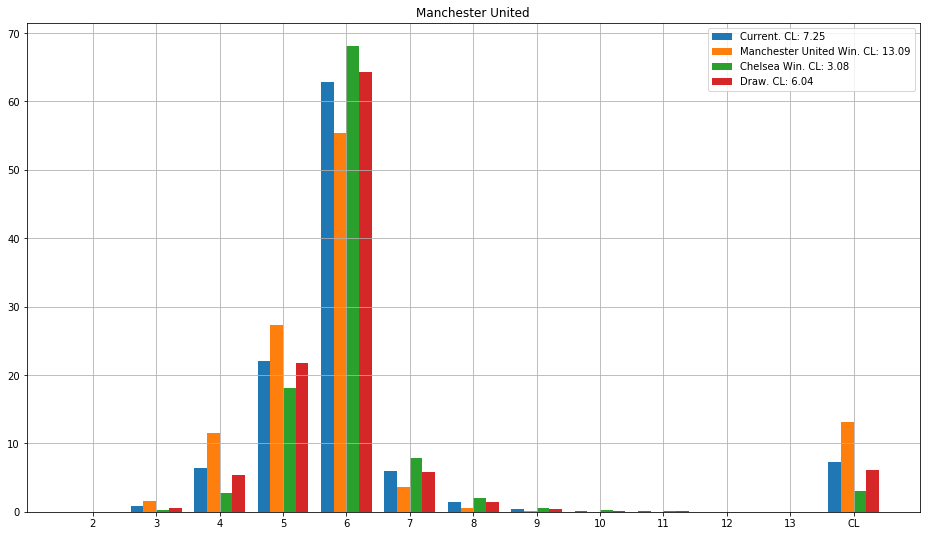

In [11]:
imp=[]
ref_team='Manchester United'
#ref_team='Liverpool'
#ref_team='Arsenal'
matches=[]
PremierLeague=League['BPL']
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl,_=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False,place=4,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    imp.append(pcl.std())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
_,fig=PremierLeague.what_if(the_match,ref_team=ref_team)

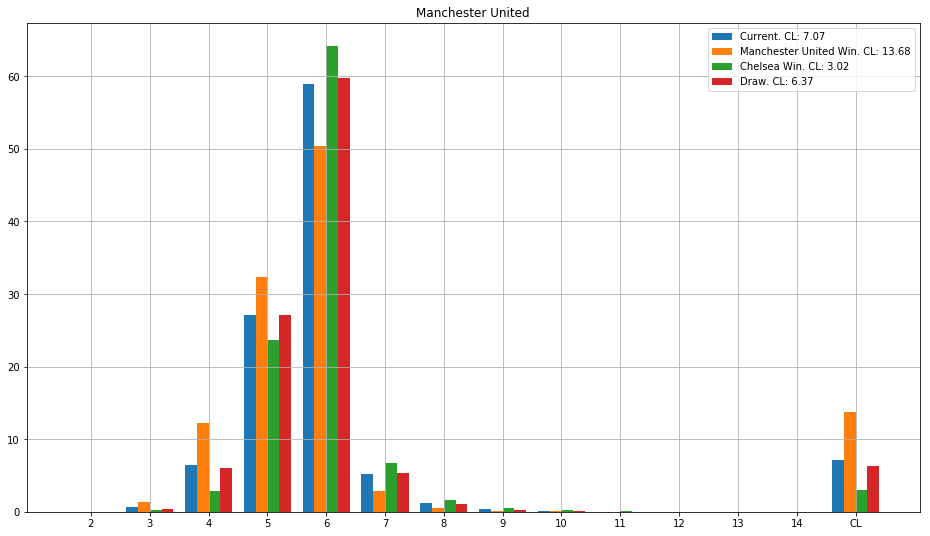

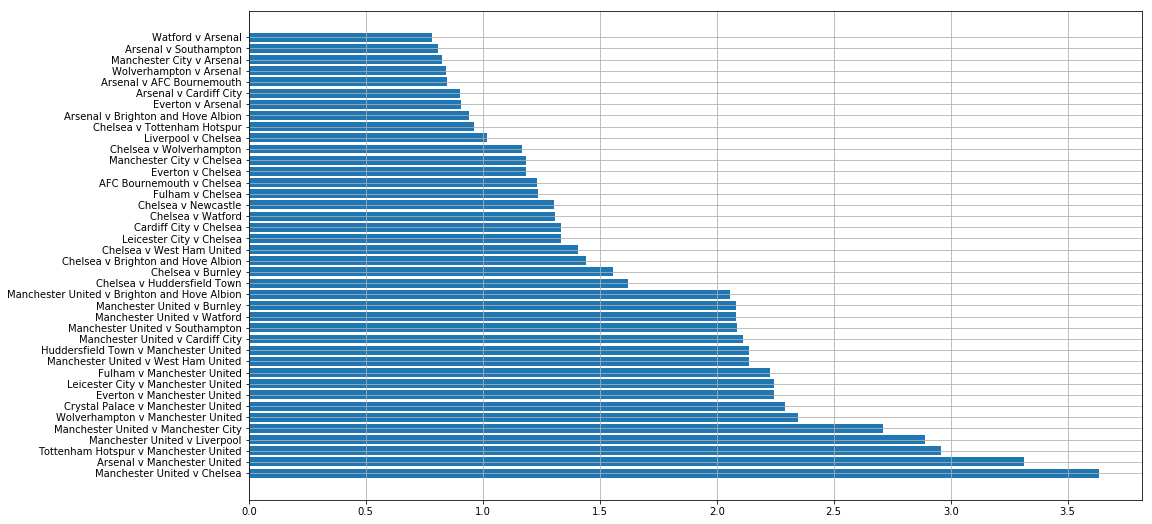

In [12]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(40)
plt.barh(xx,imp[xx])
plt.yticks(xx,matches[xx],rotation=0);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,9)

1.7016817647058824

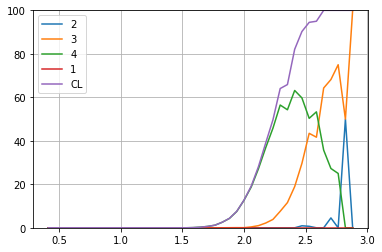

In [22]:
team_name='Manchester United'
PremierLeague=League['BPL']
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.legend()
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
pnts.mean()/n